<a href="https://colab.research.google.com/github/swap-10/Poetry-Gen/blob/main/ComeYonderShakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 35.3MB/s]


In [ ]:
data = open('./sonnets.txt').read()

data = data.lower().split('\n')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

input_sequences = []

for line in data:
  this_sequence = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(this_sequence)):
    input_sequences.append(this_sequence[:i+1])

max_seq_len = max([len(x) for x in input_sequences])
seq_padded = np.array(pad_sequences(input_sequences))

inputs, labels = seq_padded[:, :-1], seq_padded[:, -1]

labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 100, input_length=max_seq_len-1))  # -1 because the input will be one less in length than the slices in corpus - last word is to be predicted
model.add(tf.keras.layers.LSTM(156, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(96))
model.add(tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
lstm_8 (LSTM)                (None, 10, 156)           160368    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 156)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 96)                97152     
_________________________________________________________________
dense_6 (Dense)              (None, 1605)              155685    
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              5156866   
Total params: 5,891,171
Trainable params: 5,891,171
Non-trainable params: 0
____________________________________________

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if (logs.get('accuracy') > 0.96):
      print("Stopping training")
      self.model.stop_training = True

In [ ]:
NUM_EPOCHS = 150
history = model.fit(inputs, labels, epochs=NUM_EPOCHS, verbose=1)

Epoch 1/150
484/484 [==============================] - 12s 19ms/step - loss: 6.9411 - accuracy: 0.0208
Epoch 2/150
484/484 [==============================] - 9s 18ms/step - loss: 6.5149 - accuracy: 0.0223
Epoch 3/150
484/484 [==============================] - 9s 18ms/step - loss: 6.4244 - accuracy: 0.0233
Epoch 4/150
484/484 [==============================] - 8s 17ms/step - loss: 6.3375 - accuracy: 0.0261
Epoch 5/150
484/484 [==============================] - 8s 17ms/step - loss: 6.2275 - accuracy: 0.0332
Epoch 6/150
484/484 [==============================] - 8s 17ms/step - loss: 6.1245 - accuracy: 0.0365
Epoch 7/150
484/484 [==============================] - 8s 16ms/step - loss: 6.0399 - accuracy: 0.0389
Epoch 8/150
484/484 [==============================] - 8s 16ms/step - loss: 5.9543 - accuracy: 0.0417
Epoch 9/150
484/484 [==============================] - 8s 16ms/step - loss: 5.8752 - accuracy: 0.0438
Epoch 10/150
484/484 [==============================] - 8s 16ms/step - loss: 5.78

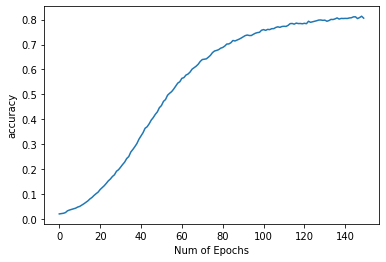

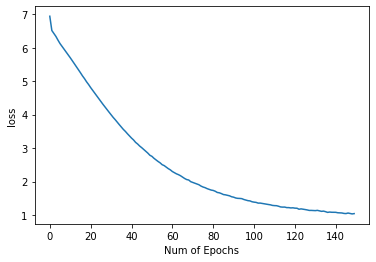

In [ ]:
def plot_metrics(metric):
  plt.plot(history.history[metric])
  plt.xlabel('Num of Epochs')
  plt.ylabel(metric)
  plt.show()

plot_metrics('accuracy')
plot_metrics('loss')

In [ ]:
seed_text = "Oh come yonder lad of the rains"
next_words = 100


for i in range(next_words):
  seq = tokenizer.texts_to_sequences([seed_text])[0]
  seq_pad = pad_sequences([seq], maxlen=max_seq_len, padding='pre')
  predicted = model.predict(seq_pad, verbose=0)
  classes = np.argmax(predicted, axis=1)
  output = ""
  for word, index in tokenizer.word_index.items():
    if index == classes:
      output += word
      break
  seed_text += " "  + output

print(seed_text)

Oh come yonder lad of the rains first i best in every steel pride esteem date scope had latch date hate of rolling sell approve cross cross cross cross kings mind weeds staineth faith light pride unbred knife knife moan ' to find me view to make away kind new wrong days fullness brought of sun invention disdain disdain gems staineth staineth moan of a tomb brow doom of wind disdain debt esteem esteem moan of moan days kings faith ' on time must you will none did lie so die to find 'will friend ' ' him by their glory but me keep so chary seen
